In [1]:
import pandas as pd
import numpy as np

In [2]:
results = pd.read_csv('sat.dat.csv', sep=';')

In [3]:
results = pd.DataFrame(results)

*state : a factor with names of each state
*expend : expenditure per pupil in average daily attendance in public elementary and secondary
*schools, 1994-95 (in thousands of US dollars) ratio average pupil/teacher ratio in public
*elementary and secondary schools, Fall 1994
*salary : estimated average annual salary of teachers in public elementary and secondary
*schools, 1994-95 (in thousands of US dollars)
*frac : percentage of all eligible students taking the SAT, 1994-95
*verbal : average verbal SAT score, 1994-95
*math : average math SAT score, 1994-95
*sat : average total SAT score, 1994-95

In [4]:
results = results.set_index('State')

In [5]:
results.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 7 columns):
Expend    50 non-null float64
Ratio     50 non-null float64
Salary    50 non-null float64
Frac      50 non-null int64
Verbal    50 non-null int64
Math      50 non-null int64
Sat       50 non-null int64
dtypes: float64(3), int64(4)
memory usage: 3.1+ KB


**Analizar gráficamente si los scores del test tienen una escala similar y los componentes tienen
relación:**

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
sat_bystate = results[['Sat', 'Math', 'Verbal']]

Populating the interactive namespace from numpy and matplotlib


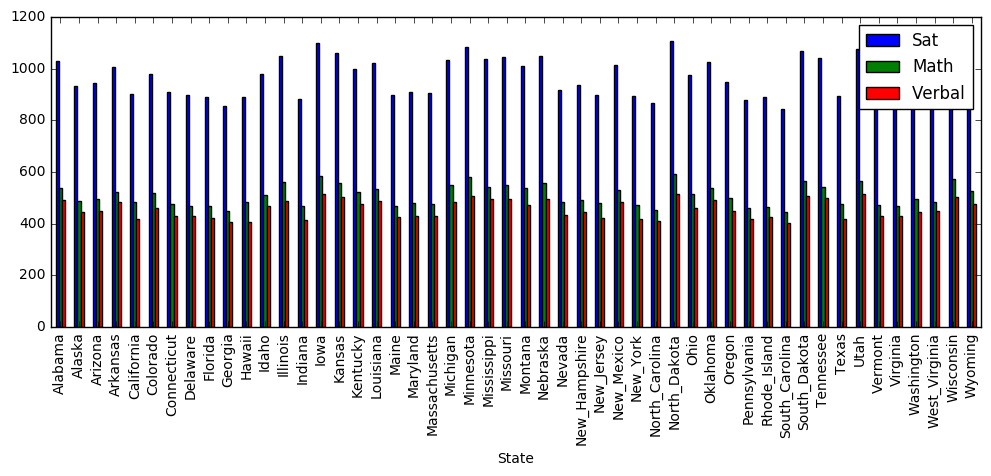

In [8]:
%pylab inline
pylab.rcParams['figure.figsize'] = (12, 4)
sat_graph = sat_bystate.plot(kind='bar')

Como podemos observar los scores del test tienen la misma escala, el rango fluctua entre 844 y 1107 puntos. El reparto de puntos del test entre las modalidades 'math' y 'verbal' está en torno al 50-50, aunque curiosamente es siempre superior el número de puntos conseguidos en la primera modalidad para todos los Estados.

**Ordenar los datos y obtener los estados que más (y menos) gastan y los que mejores (y peores)
resultados obtienen.**

In [9]:
results_sat = results.sort('Sat', ascending= False)

C:\Users\Alberto\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


Top 5 Results SAT

In [10]:
results_sat.head(5)

,Expend,Ratio,Salary,Frac,Verbal,Math,Sat
State,,,,,,,
North_Dakota,4.775,15.3,26.327,5,515,592,1107
Iowa,5.483,15.8,31.511,5,516,583,1099
Minnesota,6.000,17.5,35.948,9,506,579,1085
Utah,3.656,24.3,29.082,4,513,563,1076
Wisconsin,6.930,15.9,37.746,9,501,572,1073


Bottom 5 Results SAT

In [11]:
results_sat.tail(5)

,Expend,Ratio,Salary,Frac,Verbal,Math,Sat
State,,,,,,,
Indiana,5.826,17.5,36.785,58,415,467,882
Pennsylvania,7.109,17.1,44.510,70,419,461,880
North_Carolina,5.077,16.2,30.793,60,411,454,865
Georgia,5.193,16.3,32.291,65,406,448,854
South_Carolina,4.797,16.4,30.279,58,401,443,844


In [12]:
results_expend = results.sort('Expend', ascending=False)

C:\Users\Alberto\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


Top 5 Results Expend

In [13]:
results_expend.head(5)

,Expend,Ratio,Salary,Frac,Verbal,Math,Sat
State,,,,,,,
New_Jersey,9.774,13.8,46.087,70,420,478,898
New_York,9.623,15.2,47.612,74,419,473,892
Alaska,8.963,17.6,47.951,47,445,489,934
Connecticut,8.817,14.4,50.045,81,431,477,908
Rhode_Island,7.469,14.7,40.729,70,425,463,888


Bottom 5 Results Expend

In [15]:
results_expend.tail(5)

,Expend,Ratio,Salary,Frac,Verbal,Math,Sat
State,,,,,,,
Alabama,4.405,17.2,31.144,8,491,538,1029
Tennessee,4.388,18.6,32.477,12,497,543,1040
Idaho,4.210,19.1,29.783,15,468,511,979
Mississippi,4.080,17.5,26.818,4,496,540,1036
Utah,3.656,24.3,29.082,4,513,563,1076


**Analizar de manera intuitiva con gráficos si hay relación entre las variables que indican
resultados (las del test SAT) y las variables que indican gasto (Expend, Ratio, Salary).**

Scatter Plot : SAT Results vs Expend per Pupil

Populating the interactive namespace from numpy and matplotlib


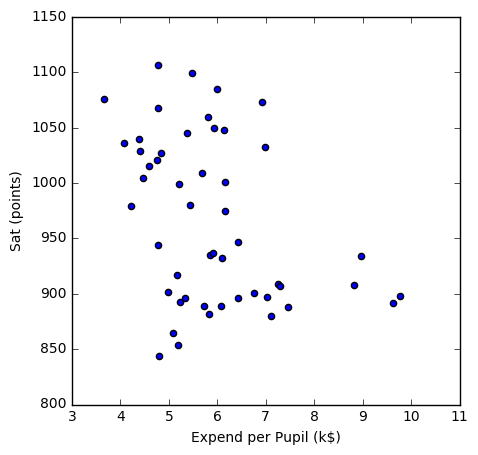

In [16]:
%pylab inline
pylab.rcParams['figure.figsize'] = (5,5)
plt.scatter(results['Expend'], results['Sat'])
plt.ylabel('Sat (points)')
plt.xlabel('Expend per Pupil (k$)')

Intuitivamente se aprecia una leve correlación negativa (a mayor gasto, peores resultados en el test)

Scatter Plot : SAT Results vs Ratio Pupils per Teacher

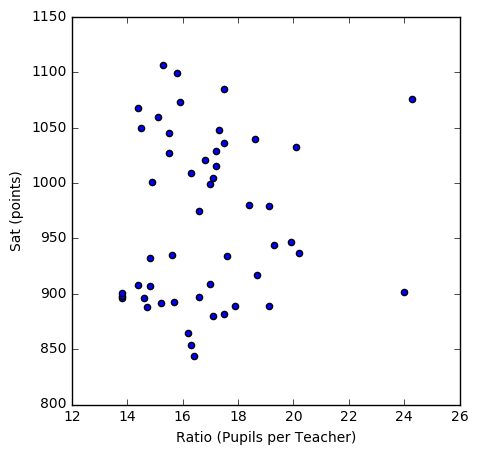

In [17]:
plt.scatter(results['Ratio'], results['Sat'])
plt.ylabel('Sat (points)')
plt.xlabel('Ratio (Pupils per Teacher)')

No se aprecia una clara correlación de manera intuitiva que explique la nube de puntos.

Scatter Plot: SAT Results vs Salary per Teacher

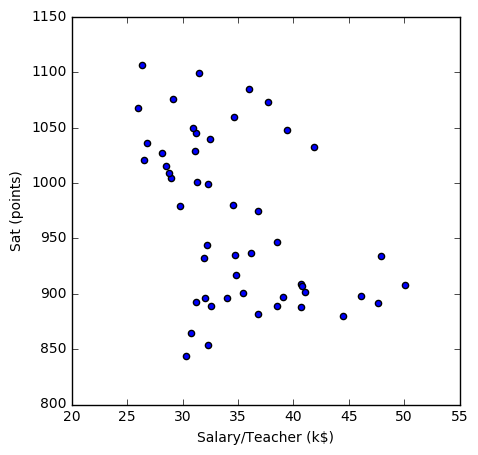

In [18]:
plt.scatter(results['Salary'], results['Sat'])
plt.ylabel('Sat (points)')
plt.xlabel('Salary/Teacher (k$)')

La correlación entre ambas variables parece ser negativa pero débil (a mayor salario del profesorado peores resultados en el test).

**Utilizar correlaciones y un modelo lineal básico como exploración numérica de ese tipo de
relación gasto/resultados. ¿Cuál es la conclusión aparente?**

Análisis 1: Explicación de los resultados del SAT en función del gasto por alumno.

In [19]:
results[['Expend','Sat']].corr(method='pearson')

,Expend,Sat
Expend,1.000000,-0.380537
Sat,-0.380537,1.000000


In [20]:
np.corrcoef(results['Expend'], results['Sat'])

array([[ 1.      , -0.380537],
       [-0.380537,  1.      ]])

In [21]:
from scipy.stats import linregress
lr1 = linregress(results['Expend'], results['Sat'])

In [22]:
lr1

LinregressResult(slope=-20.892173714658242, intercept=1089.2937177502226, rvalue=-0.38053700330456508, pvalue=0.0064079649163646252, stderr=7.3282086509038651)

In [23]:
lr1[0], lr1[1]

(-20.892173714658242, 1089.2937177502226)

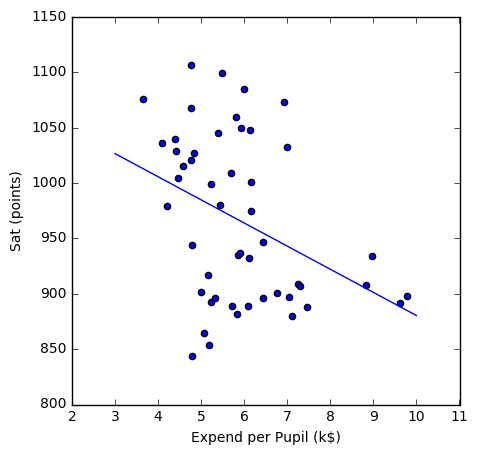

In [24]:
x = np.linspace(3,10)
y = lr1[0]*x + lr1[1]
plt.plot(x,y)
plt.scatter(results['Expend'], results['Sat'])
plt.ylabel('Sat (points)')
plt.xlabel('Expend per Pupil (k$)')

Vemos que existe una ligera correlación negativa entre ambas variables, sin embargo el valor tan bajo del p-valor = 0.0064 nos podría llevar a rechazar la hipótesis nula que establecía dichah relación.

Análisis 2: Explicación de los resultados del SAT en función de la Ratio Alumnos por Profesor.

In [25]:
results[['Ratio', 'Sat']].corr(method='pearson')

,Ratio,Sat
Ratio,1.000000,0.081254
Sat,0.081254,1.000000


In [26]:
lr2 = linregress(results['Ratio'], results['Sat'])
lr2

LinregressResult(slope=2.6824824043693281, intercept=920.69871162714185, rvalue=0.081253823059452571, pvalue=0.5748329019700007, stderr=4.7493487300417057)

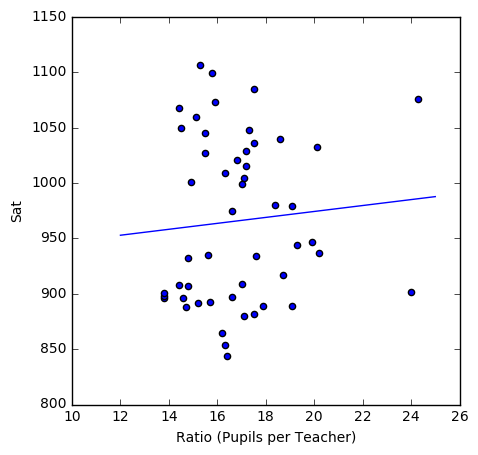

In [27]:
x = np.linspace(12,25)
y = lr2[0]*x + lr2[1]
plt.plot(x,y)
plt.scatter(results['Ratio'], results['Sat'])
plt.ylabel('Sat')
plt.xlabel('Ratio (Pupils per Teacher)')

El ajuste de los datos no es bueno para con la recta de regresión a la luz de los resultados. El p-valor impide rechazar la hipótesis nula que establece que no hay relación estrecha entre ambas muestras.

Análisis 3: Explicación de los resultados del SAT en función del Salario anual del Profesor.

In [28]:
results[['Salary', 'Sat']].corr(method='pearson')

,Salary,Sat
Salary,1.000000,-0.439883
Sat,-0.439883,1.000000


In [29]:
from scipy.stats import pearsonr
pearsonr(results['Salary'], results['Sat'])

(-0.43988338144170569, 0.0013913104589199582)

In [30]:
lr3 = linregress(results['Salary'], results['Sat'])
lr3

LinregressResult(slope=-5.5396146911910362, intercept=1158.8587969103173, rvalue=-0.43988338144170575, pvalue=0.0013913104589199567, stderr=1.6323913078741954)

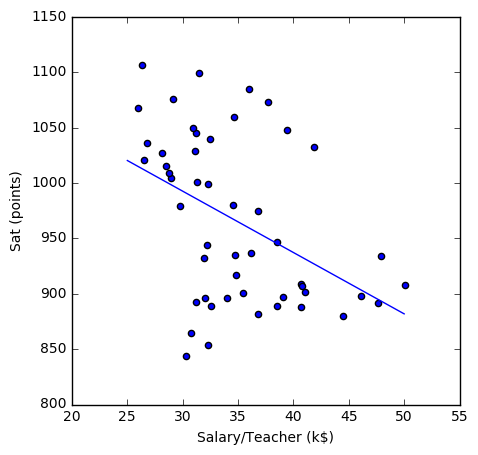

In [31]:
x = np.linspace(25,50)
y = lr3[0]*x + lr3[1]
plt.plot(x,y)
plt.scatter(results['Salary'], results['Sat'])
plt.ylabel('Sat (points)')
plt.xlabel('Salary/Teacher (k$)')

La conclusión es la misma a nivel de comportamiento y explicación de los datos que para el Análisis 1.

**Utilizar la variable frac para dividir a los estados en grupos. Repetir
el análisis de la relación gasto/resultados. ¿Las conclusiones son las mismas que en el análisis
anterior?**

In [32]:
frac_1 = results[results['Frac'] < 20]

In [33]:
frac_20 = results[results['Frac'] >= 20]

In [34]:
frac_2 = frac_20[results['Frac'] < 60]

C:\Users\Alberto\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


In [35]:
frac_3 = results[results['Frac'] >= 60]

Results SAT vs Expend

In [36]:
lr_frac1 = linregress(frac_1['Expend'], frac_1['Sat'])
lr_frac2 = linregress(frac_2['Expend'], frac_2['Sat'])
lr_frac3 = linregress(frac_3['Expend'], frac_3['Sat'])


In [37]:
lr_frac1

LinregressResult(slope=1.2658527171439307, intercept=1031.0135372977863, rvalue=0.028796162705283478, pvalue=0.89877595618544037, stderr=9.8254720424677355)

In [38]:
lr_frac2

LinregressResult(slope=9.0675280713032453, intercept=871.85439599057872, rvalue=0.21099832086858644, pvalue=0.46900926146554256, stderr=12.126347814673604)

In [39]:
lr_frac3

LinregressResult(slope=3.670033154231604, intercept=868.76505415206577, rvalue=0.2819049726313132, pvalue=0.32884229703231349, stderr=3.605749099428877)

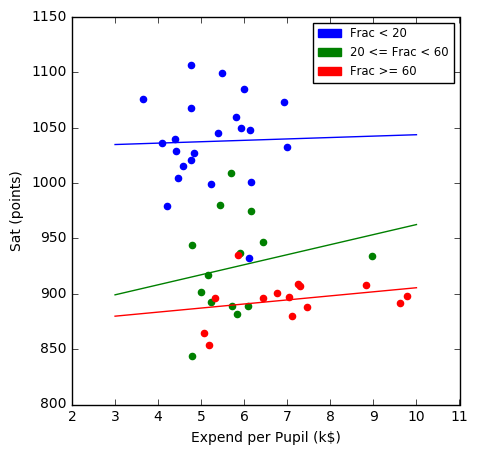

In [40]:
x = np.linspace(3,10)
y1 = lr_frac1[0]*x + lr_frac1[1]
plt.plot(x,y1)
plt.scatter(frac_1['Expend'], frac_1['Sat'], color = 'blue')

y2 = lr_frac2[0]*x + lr_frac2[1]
plt.plot(x, y2)
plt.scatter(frac_2['Expend'], frac_2['Sat'], color = 'green')

y3 = lr_frac3[0]*x + lr_frac3[1]
plt.plot(x, y3)
plt.scatter(frac_3['Expend'], frac_3['Sat'], color = 'red')

plt.ylabel('Sat (points)')
plt.xlabel('Expend per Pupil (k$)')

import matplotlib.patches as mpatches
red_patch = mpatches.Patch(color='red', label='Frac >= 60')
green_patch = mpatches.Patch(color='green', label='20 <= Frac < 60')
blue_patch = mpatches.Patch(color='blue', label='Frac < 20')

plt.legend(handles=[blue_patch, green_patch, red_patch], fontsize = 'small')

Tras clasificar la muestra según el % de alumnos elegibles que se presentan al test en cada Estado observamos una cierta correlación positiva (sobre todo en los grupos frac_2[verde] y frac_3[rojo]) en la cual, el mayor gasto por alumno se traduce en mejores resultados obtenidos, no obstante las correlaciones son débiles.



Results SAT vs Salary/Teacher

In [41]:
lr_frac1_s = linregress(frac_1['Salary'], frac_1['Sat'])
lr_frac2_s = linregress(frac_2['Salary'], frac_2['Sat'])
lr_frac3_s = linregress(frac_3['Salary'], frac_3['Sat'])

In [42]:
lr_frac1_s

LinregressResult(slope=0.58920209510468102, intercept=1019.0908259642426, rvalue=0.061737551834438679, pvalue=0.78490559519564285, stderr=2.1299560258156838)

In [43]:
lr_frac2_s

LinregressResult(slope=-0.14590731067039731, intercept=929.64264212903345, rvalue=-0.01608126161533965, pvalue=0.95648627945021092, stderr=2.6188471379110907)

In [44]:
lr_frac3_s

LinregressResult(slope=0.80751040742714619, intercept=863.0665685436602, rvalue=0.25562241471798236, pvalue=0.37774158459387719, stderr=0.88162672337881864)

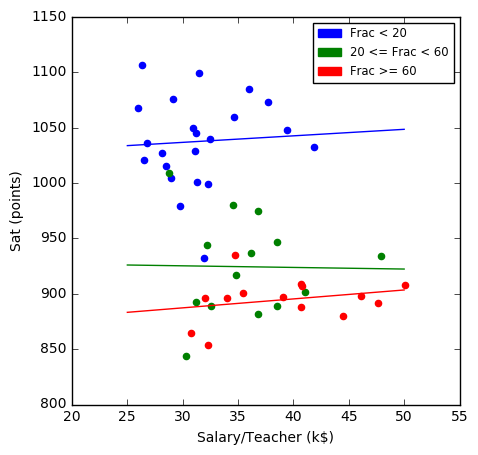

In [45]:
x = np.linspace(25,50)
y1 = lr_frac1_s[0]*x + lr_frac1_s[1]
plt.plot(x,y1)
plt.scatter(frac_1['Salary'], frac_1['Sat'], color = 'blue')

y2 = lr_frac2_s[0]*x + lr_frac2_s[1]
plt.plot(x, y2)
plt.scatter(frac_2['Salary'], frac_2['Sat'], color = 'green')

y3 = lr_frac3_s[0]*x + lr_frac3_s[1]
plt.plot(x, y3)
plt.scatter(frac_3['Salary'], frac_3['Sat'], color = 'red')

plt.ylabel('Sat (points)')
plt.xlabel('Salary/Teacher (k$)')

import matplotlib.patches as mpatches
red_patch = mpatches.Patch(color='red', label='Frac >= 60')
green_patch = mpatches.Patch(color='green', label='20 <= Frac < 60')
blue_patch = mpatches.Patch(color='blue', label='Frac < 20')

plt.legend(handles=[blue_patch, green_patch, red_patch], fontsize = 'small')

En el caso del salario del profesorado, una vez realizada la segmentación de la muestra, desaparece la correlación negativa del análisis inicial y los dos primeros grupos (frac_1[azul] y frac_2[verde]) apenas tienen correlación mientras que el tercero si muestra una leve correlación positiva respecto a los resultados del test.

Results SAT vs Ratio Pupils/Teacher

In [46]:
lr_frac1_r = linregress(frac_1['Ratio'], frac_1['Sat'])
lr_frac2_r = linregress(frac_2['Ratio'], frac_2['Sat'])
lr_frac3_r = linregress(frac_3['Ratio'], frac_3['Sat'])

In [47]:
lr_frac1_r

LinregressResult(slope=0.91865561757353609, intercept=1022.1277865287814, rvalue=0.05075934817577895, pvalue=0.82250114148973508, stderr=4.0416760090156219)

In [48]:
lr_frac2_r

LinregressResult(slope=-0.90353260869564767, intercept=941.05357142857133, rvalue=-0.042779478482228406, pvalue=0.88454706278559314, stderr=6.0914398534342125)

In [49]:
lr_frac3_r

LinregressResult(slope=-4.65555426040331, intercept=965.84450402144762, rvalue=-0.281650757072054, pvalue=0.32929734078777795, stderr=4.5784925845789086)

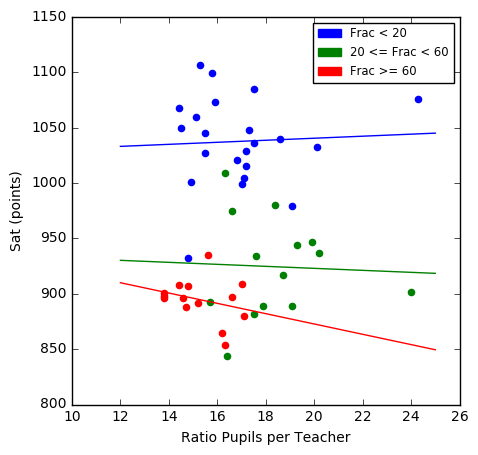

In [50]:
x = np.linspace(12,25)
y1 = lr_frac1_r[0]*x + lr_frac1_r[1]
plt.plot(x,y1)
plt.scatter(frac_1['Ratio'], frac_1['Sat'], color = 'blue')

y2 = lr_frac2_r[0]*x + lr_frac2_r[1]
plt.plot(x, y2)
plt.scatter(frac_2['Ratio'], frac_2['Sat'], color = 'green')

y3 = lr_frac3_r[0]*x + lr_frac3_r[1]
plt.plot(x, y3)
plt.scatter(frac_3['Ratio'], frac_3['Sat'], color = 'red')

plt.ylabel('Sat (points)')
plt.xlabel('Ratio Pupils per Teacher')

import matplotlib.patches as mpatches
red_patch = mpatches.Patch(color='red', label='Frac >= 60')
green_patch = mpatches.Patch(color='green', label='20 <= Frac < 60')
blue_patch = mpatches.Patch(color='blue', label='Frac < 20')

plt.legend(handles=[blue_patch, green_patch, red_patch], fontsize = 'small')

Previamente a la clasificación de la muestra en grupos, el resultado del scatter mostraba una relación (poco lógica) positiva, es decir, una supuesta mejora de los resultados del test conforme aumentaba la ratio de alumnos por profesor. Tras realizar la segmentación observamos (según sería más previsible esperar), salvo en el primer grupo, una correlación negativa entre ambas variables. Esto explicaría como, teniendo un mayor número de alumnos por clase, el tiempo dedicado a cada alumno y la calidad del mismo sería inferior por lo que, en igualdad de condiciones, cabría esperar resultados algo inferiores a los de aquellos alumnos que han disfrutado de una mejor preparación.

El ejercicio nos muestra la importancia de comprender bien la muestra objeto de análisis ya que, tal y como hemos visto, pasar ciertas variables por alto, aun sin tener éstas una fuerte relación, nos puede llevar a obtener resultados/conclusiones erróneos o poco certeros.